# PRABAL_GHOSH_AM.SC.P2CSC20040_ML_FINAL_LAB_EXAM_2.ipynb

# 1.Perform preprocessing on any suitable dataset.
#I am using brest cancer data set

# SET5

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification # Generate a random n-class classification problem. This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative -dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
plt.style.use('seaborn')

In [114]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [115]:

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

In [116]:
df = pd.read_csv("C:\\Users\\Prabal Ghosh\\Desktop\\Machine learning final lab exam\\BreastCancer.csv")

In [117]:
df.tail()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1
698,897471,4,8,8,5,4,5.0,10,4,1,1


In [118]:
df.shape

(699, 11)

In [119]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [120]:
len(df)

699

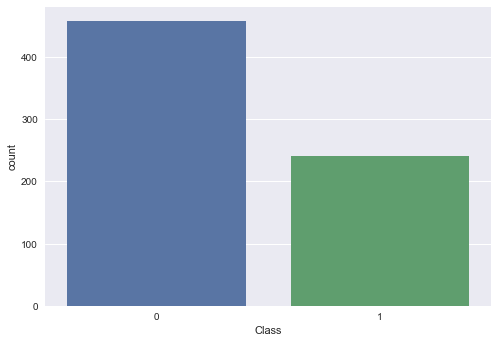

In [121]:
sns.countplot(x='Class',data=df)

In [122]:
df.dropna(axis=0,how='any' ,thresh=None, inplace=True)


In [123]:
df.shape

(683, 11)

In [124]:
len(df)

683

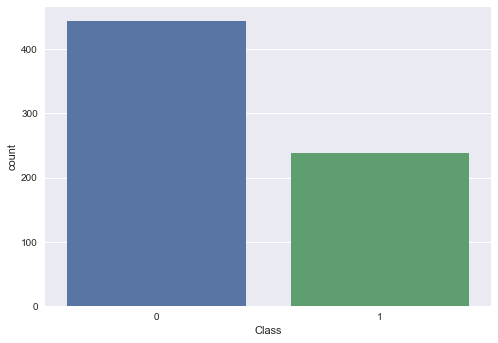

In [125]:
sns.countplot(x='Class',data=df)

In [126]:
df.drop(columns=['Id'],inplace=True)

In [127]:
df.tail()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1
698,4,8,8,5,4,5.0,10,4,1,1


In [128]:
df.shape

(683, 10)

In [129]:
df.iloc[:,0:9]

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [130]:
df.iloc[:,9]

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64

In [131]:
data_X=df.iloc[:,0:9]
class_label=df.iloc[:,9]

# 2. Using this preprocessed dataset, Generate a model based on SVC.

In [132]:
# train and test split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_X, class_label, test_size=0.2, random_state=1)


# random_state =1 ......so every time it will generate same train and test set

In [133]:
X_train

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
575,5,1,2,1,2,1.0,3,1,1
440,10,4,3,10,4,10.0,10,1,1
123,5,3,5,1,8,10.0,5,3,1
51,5,3,3,4,2,4.0,3,4,1
318,1,1,1,1,5,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
148,3,1,1,3,8,1.0,5,8,1
661,4,1,1,1,2,1.0,3,1,1
74,10,6,4,1,3,4.0,3,2,3
242,2,1,1,1,2,1.0,3,1,1


In [134]:
X_test

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
444,5,1,1,6,3,1.0,2,1,1
24,1,1,1,1,2,1.0,3,1,1
195,4,1,1,1,2,1.0,3,1,1
49,7,8,7,2,4,8.0,3,8,2
375,1,1,1,1,2,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...
90,1,1,1,1,2,1.0,3,1,1
377,1,1,1,1,1,1.0,2,1,1
374,3,1,2,1,2,1.0,2,1,1
408,2,3,2,2,2,2.0,3,1,1


In [135]:
Y_train

575    0
440    1
123    1
51     1
318    0
      ..
148    0
661    0
74     1
242    0
38     1
Name: Class, Length: 546, dtype: int64

In [136]:
Y_test

444    0
24     0
195    0
49     1
375    0
      ..
90     0
377    0
374    0
408    0
270    1
Name: Class, Length: 137, dtype: int64

# LINEAR SVM

In [137]:
from sklearn.svm import SVC
classifier_svm = SVC(C=100,random_state=1)  # linear svm applied
classifier_svm.fit(X_train,Y_train)

SVC(C=100, random_state=1)

In [138]:
print(classifier_svm.support_vectors_)

[[ 6.  9.  7.  5.  5.  8.  4.  2.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 5.  3.  4.  3.  4.  5.  4.  7.  1.]
 [ 3.  3.  2.  6.  3.  3.  3.  5.  1.]
 [ 4.  4.  4.  4.  6.  5.  7.  3.  1.]
 [ 8.  2.  1.  1.  5.  1.  1.  1.  1.]
 [ 6.  3.  3.  3.  3.  2.  6.  1.  1.]
 [ 1.  1.  1.  1.  2. 10.  3.  1.  1.]
 [ 5.  1.  2. 10.  4.  5.  2.  1.  1.]
 [ 6.  3.  3.  5.  3. 10.  3.  5.  3.]
 [ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 4.  4.  2.  1.  2.  5.  2.  1.  2.]
 [ 8.  3.  3.  1.  2.  2.  3.  2.  1.]
 [ 4.  3.  1.  1.  2.  1.  4.  8.  1.]
 [ 8.  4.  6.  3.  3.  1.  4.  3.  1.]
 [ 3.  1.  3.  1.  3.  4.  1.  1.  1.]
 [ 5.  2.  2.  2.  2.  2.  3.  2.  2.]
 [ 5.  7.  7.  1.  5.  8.  3.  4.  1.]
 [ 5.  4.  5.  1.  8.  1.  3.  6.  1.]
 [ 8.  4.  4.  5.  4.  7.  7.  8.  2.]
 [ 3.  1.  1.  1.  2.  5.  5.  1.  1.]
 [ 4.  2.  4.  3.  2.  2.  2.  1.  1.]
 [ 4.  2.  3.  5.  3.  8.  7.  6.  1.]
 [ 5.  6.  6.  2.  4. 10.  3.  6.  1.]
 [ 7.  4.  7.  4.  3.  7.  7.  6.  1.]
 [ 3.  4.  4. 10.  5.  1.

In [139]:

Y_pred = classifier_svm.predict(X_test)

In [140]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        47

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



In [141]:
# ADDED BY ME
accuracy_score(y_true=Y_test, y_pred=Y_pred)

0.9781021897810219

In [142]:
# ADDED BY ME
confusion_matrix(Y_test,Y_pred)

array([[88,  2],
       [ 1, 46]], dtype=int64)

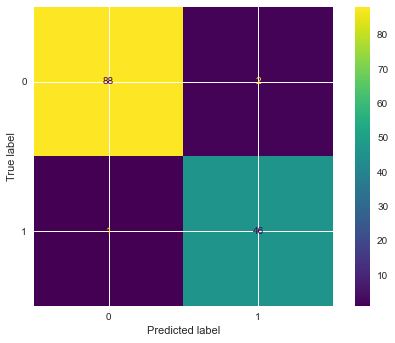

In [143]:
# ADDED BY ME
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_svm,X_test,Y_test)   


# 3. Use this model to predict the class of test set using various values of C parameter of SVC.

In [144]:
# now i will choose c=10

from sklearn.svm import SVC
classifier_svm = SVC(C=10,random_state=1)  # linear svm applied
classifier_svm.fit(X_train,Y_train)

SVC(C=10, random_state=1)

In [145]:
print(classifier_svm.support_vectors_)

[[ 1.  1.  1.  1.  2.  1.  1.  1.  8.]
 [ 6.  9.  7.  5.  5.  8.  4.  2.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 5.  3.  4.  3.  4.  5.  4.  7.  1.]
 [ 3.  3.  2.  6.  3.  3.  3.  5.  1.]
 [ 4.  4.  4.  4.  6.  5.  7.  3.  1.]
 [ 8.  2.  1.  1.  5.  1.  1.  1.  1.]
 [ 6.  3.  3.  3.  3.  2.  6.  1.  1.]
 [ 1.  1.  1.  1.  2. 10.  3.  1.  1.]
 [ 5.  1.  2. 10.  4.  5.  2.  1.  1.]
 [ 6.  3.  3.  5.  3. 10.  3.  5.  3.]
 [ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 4.  4.  2.  1.  2.  5.  2.  1.  2.]
 [ 8.  3.  3.  1.  2.  2.  3.  2.  1.]
 [ 4.  3.  1.  1.  2.  1.  4.  8.  1.]
 [ 8.  4.  6.  3.  3.  1.  4.  3.  1.]
 [ 3.  1.  3.  1.  3.  4.  1.  1.  1.]
 [ 5.  2.  2.  2.  2.  2.  3.  2.  2.]
 [ 5.  7.  7.  1.  5.  8.  3.  4.  1.]
 [ 1.  1.  1.  2.  1.  3.  1.  1.  7.]
 [ 3.  4.  5.  3.  7.  3.  4.  6.  1.]
 [ 5.  4.  5.  1.  8.  1.  3.  6.  1.]
 [ 8.  4.  4.  5.  4.  7.  7.  8.  2.]
 [ 3.  1.  1.  1.  2.  5.  5.  1.  1.]
 [ 4.  2.  4.  3.  2.  2.  2.  1.  1.]
 [ 5.  3.  3.  4.  2.  4.

In [146]:

Y_pred = classifier_svm.predict(X_test)

In [147]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        47

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



In [148]:
# ADDED BY ME
accuracy_score(y_true=Y_test, y_pred=Y_pred)

0.9927007299270073

In [149]:
# ADDED BY ME
confusion_matrix(Y_test,Y_pred)

array([[90,  0],
       [ 1, 46]], dtype=int64)

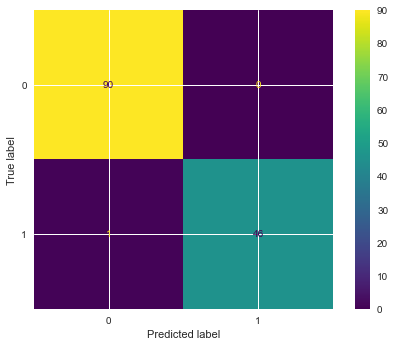

In [150]:
# ADDED BY ME
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_svm,X_test,Y_test)   


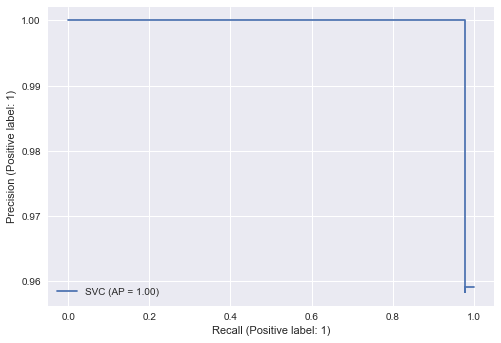

In [151]:
# ADDED BY ME
plot_precision_recall_curve(classifier_svm,X_test,Y_test)

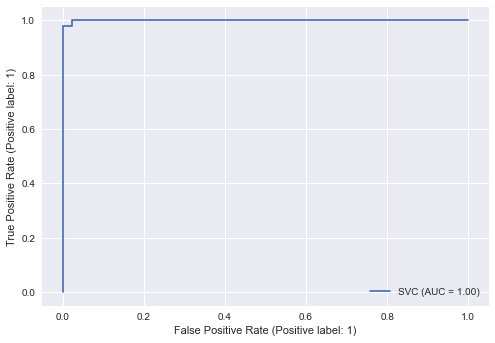

In [152]:
# ADDED BY ME
plot_roc_curve(classifier_svm,X_test,Y_test)

# 4. Perform PCA on the dataset, project the data onto the new principal components, apply SVC on this data and compare the result.

In [153]:
from sklearn.preprocessing import StandardScaler


In [154]:
scaler=StandardScaler()

In [155]:
scaled_df_features = scaler.fit_transform(data_X)

In [156]:
scaled_df_features

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [163]:
#PCA
#Perform PCA on the  scaled_df_features data set with 2 components.


In [157]:
from sklearn.decomposition import PCA

In [158]:
pca_model = PCA(n_components=2)

In [159]:
pca_scaled_df_features = pca_model.fit_transform(scaled_df_features)

In [160]:
pca_scaled_df_features.shape

(683, 2)

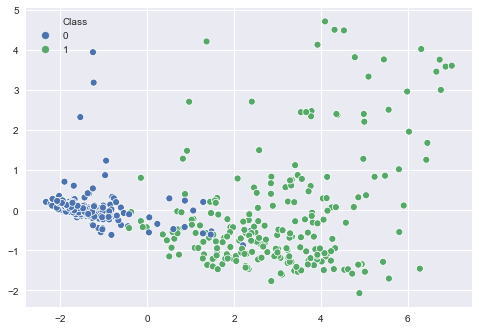

In [162]:
sns.scatterplot(pca_scaled_df_features[:,0],pca_scaled_df_features[:,1],hue=class_label)

In [164]:
#How much variance is explained by 2 principal components.
np.sum(pca_model.explained_variance_ratio_)

0.7417162482831758

In [165]:
pca_components = pca_model.components_

In [166]:
principal_br_Df = pd.DataFrame(data = pca_scaled_df_features
             , columns = ['principal component 1', 'principal component 2'])

In [167]:
principal_br_Df.tail()

,principal component 1,principal component 2
678,-1.723605,0.184232
679,-2.074148,0.231929
680,3.789261,-0.142209
681,2.240007,-1.091287
682,2.632462,-1.184698


In [207]:
df_comp = pd.DataFrame(pca_components,index=['PC1','PC2'],columns=data_X.columns)

In [208]:
df_comp

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
PC1,0.302063,0.380793,0.377583,0.332724,0.336234,0.335068,0.345747,0.335591,0.230206
PC2,-0.140801,-0.046640,-0.082422,-0.052094,0.164404,-0.261261,-0.228077,0.033966,0.905557


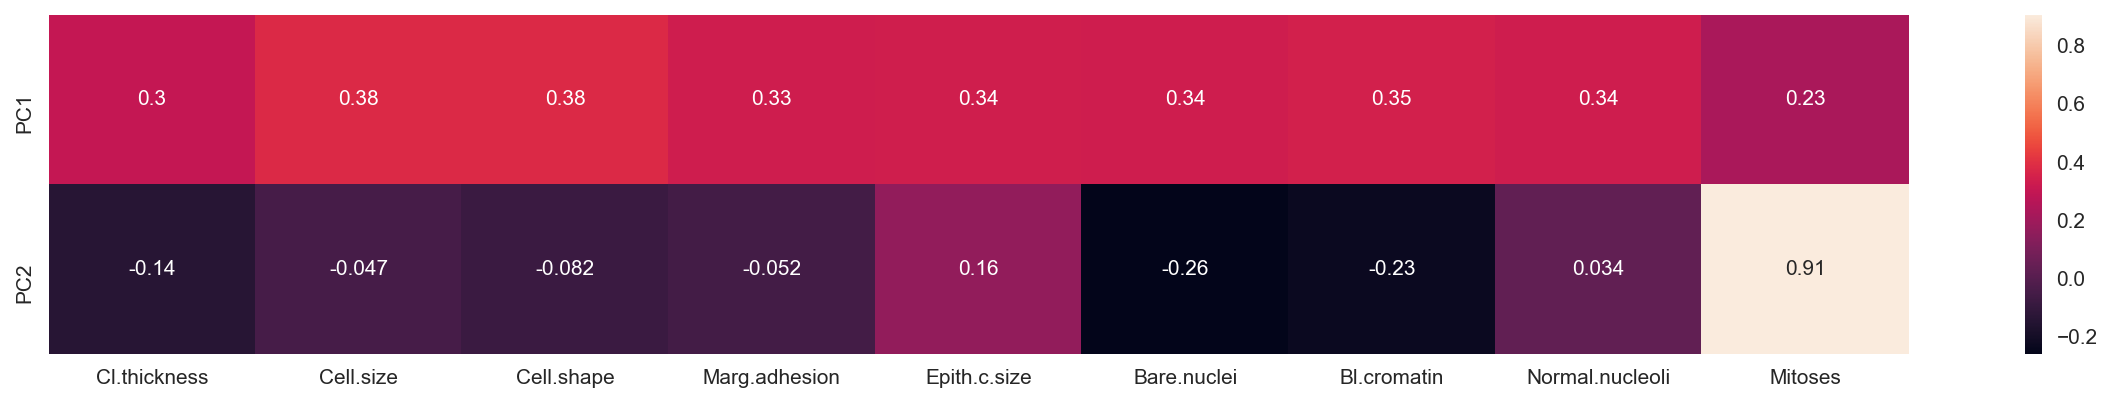

In [209]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True)

In [176]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [177]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(scaled_df_features,class_label, test_size=0.20, random_state=1)

In [178]:
X_test_pca

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.59034015,
        -0.61292736, -0.34839971],
       [-1.22119144, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [-0.15686934, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [-0.51164337, -0.70221201, -0.40692142, ..., -0.59034015,
        -0.61292736, -0.34839971],
       [-0.8664174 , -0.0492361 , -0.40692142, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 1.26222679,  0.27725185,  1.2673396 , ..., -0.18182716,
         2.00965299,  0.22916583]])

In [179]:
y_test_pca.tail()

90     0
377    0
374    0
408    0
270    1
Name: Class, dtype: int64

In [180]:
classifier_svm_pca = SVC()
classifier_svm_pca.fit(X_train_pca,y_train_pca)

SVC()

In [181]:
#Making the predictions
preds = classifier_svm_pca.predict(X_test_pca)

In [182]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [183]:
# ADDED BY ME
accuracy_score(y_true=y_test_pca, y_pred=preds)

1.0

In [185]:
cf = pd.DataFrame(confusion_matrix(y_test_pca,preds),columns=['True','False'],index=['True','False'])
cf

,True,False
True,90,0
False,0,47


In [186]:
# ADDED BY ME
confusion_matrix(y_test_pca,preds)

array([[90,  0],
       [ 0, 47]], dtype=int64)

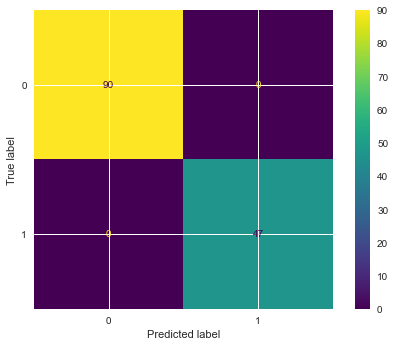

In [187]:
# ADDED BY ME
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_svm_pca,X_test_pca,y_test_pca)   


In [188]:
print(classification_report(y_test_pca,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        47

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



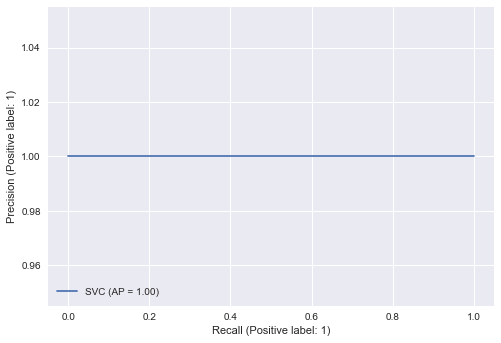

In [189]:
# ADDED BY ME
plot_precision_recall_curve(classifier_svm_pca,X_test_pca,y_test_pca)

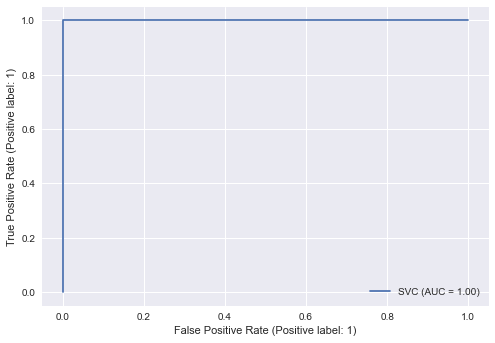

In [190]:
# ADDED BY ME
plot_roc_curve(classifier_svm_pca,X_test_pca,y_test_pca)

# 5. Compare the result with KNN classifier in terms of accuracy by constructing a confusion matrix.

In [191]:
model_knn = KNeighborsClassifier(n_neighbors=4)

In [192]:
model_knn.fit(X_train, Y_train)

# predict probabilities
pred_prob2 = model_knn.predict_proba(X_test)

In [193]:
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
print(fpr2)

[0.         0.         0.         0.         0.01111111 1.        ]


In [194]:
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])

print(auc_score2)

0.9998817966903074


In [196]:

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plt.style.use('seaborn')

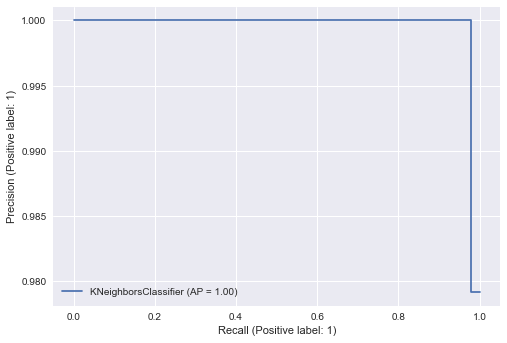

In [197]:
# ADDED BY ME
plot_precision_recall_curve(model_knn,X_test,Y_test)

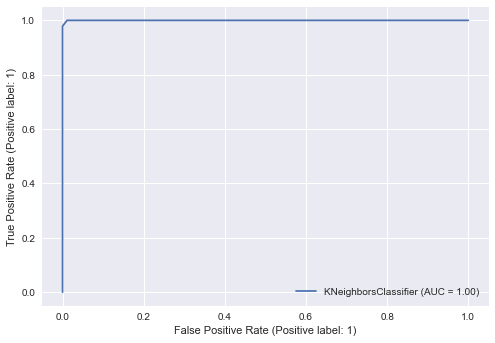

In [198]:
# ADDED BY ME
plot_roc_curve(model_knn,X_test,Y_test)

In [199]:
# ADDED BY ME
pred_y_KNN=model_knn.predict(X_test)
pred_y_KNN

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [203]:
# ADDED BY ME
accuracy_score(y_true=Y_test, y_pred=pred_y_KNN)

0.9781021897810219

In [200]:
# ADDED BY ME
confusion_matrix(Y_test,pred_y_KNN)

array([[90,  0],
       [ 3, 44]], dtype=int64)

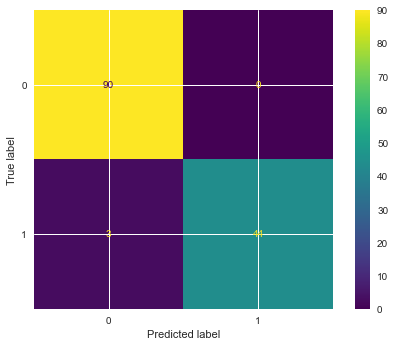

In [201]:
# ADDED BY ME
plot_confusion_matrix(model_knn,X_test,Y_test)  

In [202]:
# ADDED BY ME
print(classification_report(Y_test,pred_y_KNN))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        47

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137



# 6.Compare the result with KNN classifier using ROC curve

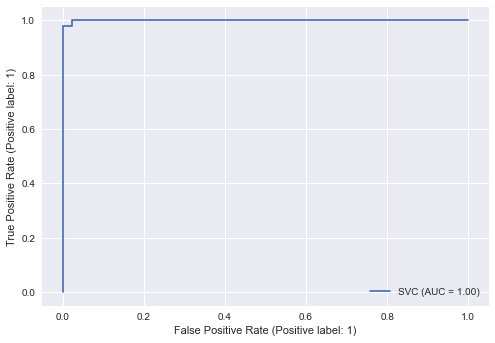

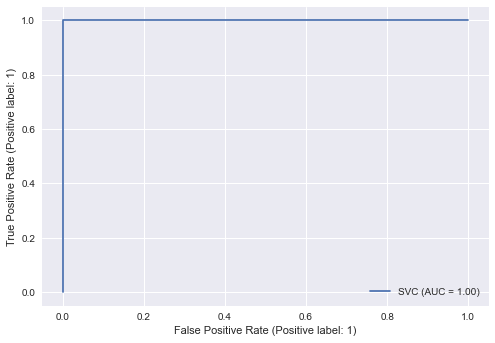

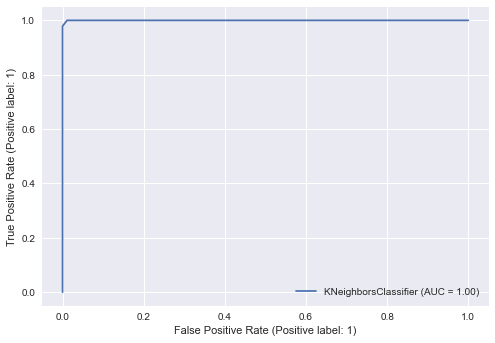

In [204]:
# normal LINEAR SVM
plot_roc_curve(classifier_svm,X_test,Y_test)
# LINEAR SVM AFTER PCA 
plot_roc_curve(classifier_svm_pca,X_test_pca,y_test_pca)

# KNN 
plot_roc_curve(model_knn,X_test,Y_test)